In [11]:
from nltk.tokenize.casual import casual_tokenize
import gensim
from gensim import corpora
import re
import pandas as pd
import numpy as np
from string import punctuation
from gensim.models import CoherenceModel
import os

input_filepath="../../data/clean/"
filename="trisma2016_cleaned_text_by_lga_and_time_of_day.csv"

In [50]:
nswdf_target = pd.read_csv(input_filepath+"filtered_target.csv", index_col=1)

nswdf_target = nswdf_target.iloc[:,1:]

In [13]:


tweetdf=pd.read_csv(os.path.join(input_filepath, filename),header=0,keep_default_na=False)
tweetdf

,Unnamed: 0,lga,time_of_day,text,cleaned
0,0,Albury,afternoon,"I can't say if its ""personally directed"" @ me ...",can't say if its personally directed me but wh...
1,1,Albury,evening,New year resolution \n\nFind another job so yo...,new year resolution find another job so you do...
2,2,Albury,morning,@BluesTumut @Group9RL going to be a smashing s...,going to be smashing season this year good luc...
3,3,Albury,night,#2015bestnine🌟 #BestOfNine2015 #byebye #2015 #...,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,4,Armidale Regional,afternoon,#تنفيذ_القصاص_على_47_ارهابي\n\nليسوا على مذهب ...,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,5,Armidale Regional,evening,@Photos_KP bit of a rare site over there.. @Ph...,bit of rare site over there can't it's overcas...
6,6,Armidale Regional,morning,@RebeccaRacer woohoo! I think there's also a n...,woohoo think there's also number of people exc...
7,7,Armidale Regional,night,Tranquility in the Park. @ Moore Park Inn Bout...,tranquility in the park moore park inn boutiqu...
8,8,Ballina,afternoon,When my lil sister calls her close friends cou...,when my lil sister calls her close friends cou...
9,9,Ballina,evening,If you are feeling too positive about yourself...,if you are feeling too positive about yourself...


In [14]:
#now split by various doc types and run LGA. DO i need to write out interim files? Not really, not yet

by_lga = tweetdf
by_lga = by_lga.set_index("lga")
by_lga

,Unnamed: 0,time_of_day,text,cleaned
lga,,,,
Albury,0,afternoon,"I can't say if its ""personally directed"" @ me ...",can't say if its personally directed me but wh...
Albury,1,evening,New year resolution \n\nFind another job so yo...,new year resolution find another job so you do...
Albury,2,morning,@BluesTumut @Group9RL going to be a smashing s...,going to be smashing season this year good luc...
Albury,3,night,#2015bestnine🌟 #BestOfNine2015 #byebye #2015 #...,#2015bestnine #bestofnine2015 #byebye #2015 #h...
Armidale Regional,4,afternoon,#تنفيذ_القصاص_على_47_ارهابي\n\nليسوا على مذهب ...,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
Armidale Regional,5,evening,@Photos_KP bit of a rare site over there.. @Ph...,bit of rare site over there can't it's overcas...
Armidale Regional,6,morning,@RebeccaRacer woohoo! I think there's also a n...,woohoo think there's also number of people exc...
Armidale Regional,7,night,Tranquility in the Park. @ Moore Park Inn Bout...,tranquility in the park moore park inn boutiqu...
Ballina,8,afternoon,When my lil sister calls her close friends cou...,when my lil sister calls her close friends cou...


In [38]:
toks = [x.split(" ") if (not pd.isnull(x)) else [''] for x in by_lga[by_lga["cleaned"] != ""]["cleaned"] ]

dictionary = corpora.Dictionary(toks)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000) 
corpus = [dictionary.doc2bow(doc) for doc in toks]
# Set up log to terminal
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = gensim.models.ldamodel.LdaModel(corpus, num_topics=300, id2word = dictionary, passes=50)

2018-05-23 11:28:03,635 : INFO : using symmetric alpha at 0.0033333333333333335
2018-05-23 11:28:03,637 : INFO : using symmetric eta at 0.0033333333333333335
2018-05-23 11:28:03,645 : INFO : using serial LDA version on this node
2018-05-23 11:28:04,917 : INFO : running online (multi-pass) LDA training, 300 topics, 50 passes over the supplied corpus of 516 documents, updating model once every 516 documents, evaluating perplexity every 516 documents, iterating 50x with a convergence threshold of 0.001000
2018-05-23 11:28:23,470 : INFO : -25.047 per-word bound, 34675998.6 perplexity estimate based on a held-out corpus of 516 documents with 3964019 words
2018-05-23 11:28:23,471 : INFO : PROGRESS: pass 0, at document #516/516
2018-05-23 11:28:38,756 : INFO : topic #45 (0.003): 0.072*"degc" + 0.033*"mm" + 0.027*"temp" + 0.026*"pressure" + 0.025*"wind" + 0.022*"rising" + 0.021*"dew" + 0.020*"slowly" + 0.019*"hpa" + 0.017*"0.0"
2018-05-23 11:28:38,758 : INFO : topic #172 (0.003): 0.005*"💕" + 0

2018-05-23 11:33:25,656 : INFO : topic #15 (0.003): 0.002*"beach" + 0.002*"bay" + 0.002*"#auspol" + 0.001*"valley" + 0.001*"blue" + 0.001*"harbour" + 0.001*"#sydney" + 0.001*"byron" + 0.001*"degc" + 0.001*"clear"
2018-05-23 11:33:25,657 : INFO : topic #225 (0.003): 0.044*"0.0" + 0.034*"mb" + 0.034*"mm" + 0.034*"barometer" + 0.029*"humidity" + 0.026*"wind" + 0.025*"temperature" + 0.020*"degc" + 0.016*"falling" + 0.014*"slowly"
2018-05-23 11:33:25,659 : INFO : topic #259 (0.003): 0.014*"degc" + 0.014*"wind" + 0.012*"0.0" + 0.011*"barometer" + 0.010*"mm" + 0.010*"mb" + 0.009*"temperature" + 0.008*"slowly" + 0.007*"falling" + 0.006*"humidity"
2018-05-23 11:33:25,687 : INFO : topic diff=inf, rho=0.377964
2018-05-23 11:34:02,143 : INFO : -9.795 per-word bound, 888.3 perplexity estimate based on a held-out corpus of 516 documents with 3964019 words
2018-05-23 11:34:02,143 : INFO : PROGRESS: pass 6, at document #516/516
2018-05-23 11:34:37,107 : INFO : topic #34 (0.003): 0.050*"degc" + 0.030*"

2018-05-23 11:40:35,109 : INFO : topic #17 (0.003): 0.071*"uralla" + 0.014*"england" + 0.014*"488" + 0.013*"nambucca" + 0.012*"greenhills" + 0.012*"burn" + 0.012*"creek" + 0.012*"2447" + 0.012*"bakers" + 0.012*"#burnoff"
2018-05-23 11:40:35,110 : INFO : topic #180 (0.003): 0.064*"#bronxnation" + 0.060*"#gotheroos" + 0.054*"#greenandgoldpride" + 0.045*"#bbtid" + 0.033*"#broncosstable" + 0.029*"kangaroo" + 0.021*"bronco" + 0.020*"#f1" + 0.017*"corey" + 0.014*"trbojevic"
2018-05-23 11:40:35,112 : INFO : topic #163 (0.003): 0.066*"#gospartan" + 0.061*"balmoral" + 0.024*"mosman" + 0.014*"sxsw" + 0.010*"exponentially" + 0.010*"refuelling" + 0.010*"tyrion" + 0.008*"rising" + 0.007*"humidity" + 0.006*"temperature"
2018-05-23 11:40:35,143 : INFO : topic diff=inf, rho=0.277350
2018-05-23 11:41:09,651 : INFO : -8.638 per-word bound, 398.3 perplexity estimate based on a held-out corpus of 516 documents with 3964019 words
2018-05-23 11:41:09,652 : INFO : PROGRESS: pass 12, at document #516/516
2018

2018-05-23 11:46:12,021 : INFO : topic #264 (0.003): 0.042*"👊" + 0.024*"✔" + 0.011*"🙌" + 0.010*"cabonne" + 0.007*"cargo" + 0.007*"mr" + 0.007*"😘" + 0.007*"🐾" + 0.006*"hills" + 0.006*"😝"
2018-05-23 11:46:12,022 : INFO : topic #57 (0.003): 0.002*"0.0" + 0.001*"degc" + 0.001*"mm" + 0.001*"humidity" + 0.001*"temperature" + 0.001*"barometer" + 0.001*"wind" + 0.001*"mb" + 0.001*"slowly" + 0.001*"rising"
2018-05-23 11:46:12,024 : INFO : topic #33 (0.003): 0.002*"government" + 0.002*"#auspol" + 0.002*"beer" + 0.002*"greens" + 0.002*"queanbeyan" + 0.001*"vote" + 0.001*"media" + 0.001*"quite" + 0.001*"canberra" + 0.001*"labor"
2018-05-23 11:46:12,025 : INFO : topic #21 (0.003): 0.026*"fy" + 0.022*"mn" + 0.015*"kl" + 0.011*"ly" + 0.011*"ny" + 0.008*"wl" + 0.008*"lm" + 0.008*"kn" + 0.007*"ykwn" + 0.007*"khwy"
2018-05-23 11:46:12,053 : INFO : topic diff=inf, rho=0.229416
2018-05-23 11:46:34,472 : INFO : -8.424 per-word bound, 343.4 perplexity estimate based on a held-out corpus of 516 documents wit

2018-05-23 11:50:03,275 : INFO : topic #20 (0.003): 0.037*"blayney" + 0.019*"murrumbidgee" + 0.017*"#burnoff" + 0.017*"burn" + 0.016*"forest" + 0.015*"mt" + 0.015*"macquarie" + 0.014*"#longweekend" + 0.012*"rihanna" + 0.011*"hazmat"
2018-05-23 11:50:03,276 : INFO : topic #233 (0.003): 0.012*"immaculate" + 0.006*"lng" + 0.006*"callum" + 0.006*"2k" + 0.006*"reinforcements" + 0.006*"full-time" + 0.006*"moran" + 0.006*"situations" + 0.006*"lisp" + 0.006*"dumplings"
2018-05-23 11:50:03,278 : INFO : topic #221 (0.003): 0.031*"👊" + 0.009*"scone" + 0.008*"😬" + 0.007*"race" + 0.007*"😴" + 0.007*"✌" + 0.007*"hunter" + 0.006*"👏" + 0.005*"upper" + 0.005*"gramps"
2018-05-23 11:50:03,279 : INFO : topic #27 (0.003): 0.003*"degc" + 0.002*"wind" + 0.002*"mm" + 0.002*"0.0" + 0.001*"barometer" + 0.001*"temperature" + 0.001*"mb" + 0.001*"humidity" + 0.001*"rising" + 0.001*"slowly"
2018-05-23 11:50:03,308 : INFO : topic diff=inf, rho=0.200000
2018-05-23 11:50:23,052 : INFO : -8.366 per-word bound, 329.9 per

2018-05-23 11:53:35,092 : INFO : topic #268 (0.003): 0.048*"bellingen" + 0.018*"urunga" + 0.015*"2454" + 0.012*"thora" + 0.011*"#urunga" + 0.011*"dorrigo" + 0.011*"reduction" + 0.011*"#hazardreduction" + 0.011*"hazard" + 0.011*"waterfall"
2018-05-23 11:53:35,093 : INFO : topic #267 (0.003): 0.030*"valley" + 0.030*"clarence" + 0.027*"innes" + 0.025*"glen" + 0.024*"2370" + 0.022*"newton" + 0.020*"boyd" + 0.018*"severn" + 0.017*"bts" + 0.014*"shots"
2018-05-23 11:53:35,095 : INFO : topic #2 (0.003): 0.000*"0.0" + 0.000*"wind" + 0.000*"degc" + 0.000*"humidity" + 0.000*"temperature" + 0.000*"mm" + 0.000*"barometer" + 0.000*"slowly" + 0.000*"beach" + 0.000*"mb"
2018-05-23 11:53:35,096 : INFO : topic #126 (0.003): 0.000*"temperature" + 0.000*"barometer" + 0.000*"degc" + 0.000*"humidity" + 0.000*"0.0" + 0.000*"wind" + 0.000*"slowly" + 0.000*"mm" + 0.000*"hpa" + 0.000*"rising"
2018-05-23 11:53:35,129 : INFO : topic diff=inf, rho=0.179605
2018-05-23 11:53:53,208 : INFO : -8.340 per-word bound, 3

2018-05-23 11:56:59,283 : INFO : topic #79 (0.003): 0.000*"😘" + 0.000*"💋" + 0.000*"wind" + 0.000*"humidity" + 0.000*"temperature" + 0.000*"mm" + 0.000*"0.0" + 0.000*"degc" + 0.000*"gorgeous" + 0.000*"barometer"
2018-05-23 11:56:59,285 : INFO : topic #292 (0.003): 0.000*"😘" + 0.000*"💋" + 0.000*"beach" + 0.000*"gorgeous" + 0.000*"#auspol" + 0.000*"kiama" + 0.000*"0.0" + 0.000*"valley" + 0.000*"temperature" + 0.000*"barometer"
2018-05-23 11:56:59,286 : INFO : topic #19 (0.003): 0.037*"hume" + 0.028*"greater" + 0.019*"holbrook" + 0.012*"#landcare" + 0.010*"submarine" + 0.008*"jindera" + 0.007*"2660" + 0.006*"spring" + 0.006*"equipment" + 0.005*"#ausag"
2018-05-23 11:56:59,287 : INFO : topic #23 (0.003): 0.098*"bland" + 0.055*"agency" + 0.055*"assist" + 0.054*"#assistotheragency" + 0.042*"ungarie" + 0.031*"north" + 0.025*"wyalong" + 0.015*"10:52" + 0.009*"👏" + 0.008*"#flooding"
2018-05-23 11:56:59,316 : INFO : topic diff=inf, rho=0.164399
2018-05-23 11:57:17,956 : INFO : -8.324 per-word bou

2018-05-23 12:00:26,633 : INFO : topic #250 (0.003): 0.081*"narromine" + 0.036*"aah" + 0.021*"2821" + 0.015*"06:57" + 0.012*"warren" + 0.012*"811" + 0.012*"2869" + 0.012*"tomingley" + 0.012*"06:24" + 0.009*"10:18"
2018-05-23 12:00:26,634 : INFO : topic #294 (0.003): 0.051*"orange" + 0.013*"police" + 0.010*"#orange" + 0.009*"#nswpol" + 0.006*"drinking" + 0.005*"#travel" + 0.005*"#redv" + 0.005*"#orangevotes" + 0.005*"drug" + 0.005*"🙌"
2018-05-23 12:00:26,636 : INFO : topic #124 (0.003): 0.076*"0.0" + 0.069*"mb" + 0.067*"barometer" + 0.067*"degc" + 0.067*"humidity" + 0.067*"temperature" + 0.067*"mm" + 0.067*"wind" + 0.039*"slowly" + 0.032*"rising"
2018-05-23 12:00:26,637 : INFO : topic #270 (0.003): 0.000*"0.0" + 0.000*"humidity" + 0.000*"wind" + 0.000*"mm" + 0.000*"temperature" + 0.000*"degc" + 0.000*"mb" + 0.000*"barometer" + 0.000*"beach" + 0.000*"falling"
2018-05-23 12:00:26,672 : INFO : topic diff=inf, rho=0.152499
2018-05-23 12:00:46,914 : INFO : -8.313 per-word bound, 318.0 perple

2018-05-23 12:03:56,547 : INFO : topic #190 (0.003): 0.000*"temperature" + 0.000*"barometer" + 0.000*"degc" + 0.000*"humidity" + 0.000*"0.0" + 0.000*"wind" + 0.000*"mm" + 0.000*"mb" + 0.000*"beach" + 0.000*"slowly"
2018-05-23 12:03:56,549 : INFO : topic #109 (0.003): 0.038*"genocide" + 0.037*"slow" + 0.036*"including" + 0.036*"denial" + 0.036*"motion" + 0.035*"ve" + 0.034*"papua" + 0.022*"ex" + 0.022*"extremists" + 0.022*"government"
2018-05-23 12:03:56,550 : INFO : topic #80 (0.003): 0.059*"dubbo" + 0.033*"#dubbo" + 0.022*"#agchatoz" + 0.021*"👅" + 0.019*"#artlands2016" + 0.016*"regional" + 0.014*"👩" + 0.013*"💯" + 0.011*"babe" + 0.009*"2830"
2018-05-23 12:03:56,551 : INFO : topic #174 (0.003): 0.054*"berrigan" + 0.025*"tocumwal" + 0.018*"finley" + 0.017*"#haystackfire" + 0.017*"haystack" + 0.013*"cobram" + 0.012*"murray" + 0.008*"2713" + 0.007*"#riverina" + 0.006*"narrandera"
2018-05-23 12:03:56,579 : INFO : topic diff=inf, rho=0.142857
2018-05-23 12:04:15,322 : INFO : -8.304 per-word 

In [36]:
len(dictionary.keys())

43641

In [39]:
model.show_topics(100)

[(252,
  '0.000*"degc" + 0.000*"beach" + 0.000*"wind" + 0.000*"valley" + 0.000*"#auspol" + 0.000*"0.0" + 0.000*"mm" + 0.000*"temperature" + 0.000*"hpa" + 0.000*"humidity"'),
 (225,
  '0.007*"qeii" + 0.007*"cyclical" + 0.000*"0.0" + 0.000*"mb" + 0.000*"mm" + 0.000*"barometer" + 0.000*"humidity" + 0.000*"wind" + 0.000*"temperature" + 0.000*"degc"'),
 (243,
  '0.081*"muswellbrook" + 0.044*"2333" + 0.022*"23:14" + 0.019*"burn" + 0.019*"#burnoff" + 0.019*"gap" + 0.018*"23:09" + 0.018*"heliers" + 0.015*"00:02" + 0.014*"baerami"'),
 (74,
  '0.033*"leeton" + 0.018*"🌿" + 0.017*"sweet" + 0.016*"paleo" + 0.015*"🍃" + 0.014*"potato" + 0.012*"chicken" + 0.010*"bacon" + 0.009*"#paleo" + 0.008*"dalton"'),
 (156,
  '0.002*"album" + 0.002*"<3" + 0.002*"brother" + 0.002*"available" + 0.002*"ppl" + 0.002*"100" + 0.002*"climate" + 0.002*"sold" + 0.002*"version" + 0.002*"solar"'),
 (180,
  '0.177*"#bronxnation" + 0.176*"#bbtid" + 0.092*"#broncosstable" + 0.056*"#greenandgoldpride" + 0.047*"#gotheroos" + 0.0

In [41]:
model.save("userldamodel.pk")

2018-05-23 12:12:20,155 : INFO : saving LdaState object under userldamodel.pk.state, separately None
2018-05-23 12:12:20,157 : INFO : storing np array 'sstats' to userldamodel.pk.state.sstats.npy
2018-05-23 12:12:20,218 : INFO : saved userldamodel.pk.state
2018-05-23 12:12:20,260 : INFO : saving LdaModel object under userldamodel.pk, separately ['expElogbeta', 'sstats']
2018-05-23 12:12:20,261 : INFO : storing np array 'expElogbeta' to userldamodel.pk.expElogbeta.npy
2018-05-23 12:12:20,313 : INFO : not storing attribute state
2018-05-23 12:12:20,314 : INFO : not storing attribute id2word
2018-05-23 12:12:20,315 : INFO : not storing attribute dispatcher
2018-05-23 12:12:20,317 : INFO : saved userldamodel.pk


In [ ]:
model = gensim.models.ldamodel.LdaModel.load("userldamodel.pk")

In [ ]:
toks

In [40]:
model.top_topics(corpus)

[([(0.0011599183, 'business'),
   (0.001087148, 'called'),
   (0.0010437827, 'lunch'),
   (0.0009894944, 'public'),
   (0.00097459735, 'students'),
   (0.0009650007, 'breakfast'),
   (0.000961153, 'different'),
   (0.0009492588, 'online'),
   (0.00089239737, 'wonder'),
   (0.0008769173, 'sign'),
   (0.00086555345, 'huge'),
   (0.0008635275, 'visit'),
   (0.0008616194, 'women'),
   (0.0008548993, 'follow'),
   (0.0008467651, 'outside'),
   (0.0008371629, 'problem'),
   (0.00083627744, 'fantastic'),
   (0.00081751856, 'city'),
   (0.00081381213, 'afternoon'),
   (0.0008077738, 'number')],
  -0.3053290896698087),
 ([(0.0027197239, 'government'),
   (0.0019504484, 'beer'),
   (0.0018012658, 'greens'),
   (0.0016839196, '#auspol'),
   (0.0016010924, 'vote'),
   (0.0015365249, 'jesus'),
   (0.0015197766, 'labor'),
   (0.001470067, 'hell'),
   (0.0014501732, 'media'),
   (0.0014498903, 'quite'),
   (0.0013947777, 'election'),
   (0.0013910448, 'either'),
   (0.0013796283, 'turnbull'),
   (0.0

In [42]:
#classify lgas
inferred = model.inference(corpus)
inferred = inferred[0]

In [43]:
import numpy as np
inferdf = pd.DataFrame(inferred)


In [ ]:
corpus

In [44]:
inferdf.index = by_lga.index
inferdf

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
lga,,,,,,,,,,,,,,,,,,,,,
Albury,0.003333,60.645866,0.003333,0.003333,0.003333,299.389740,0.003333,9.222625,0.003333,3.919390,...,0.003333,4.814570,0.003333,0.003333,0.003333,0.003333,119.503784,0.003333,155.811310,0.003333
Albury,0.003333,92.571312,0.003333,0.003333,0.003333,456.313965,0.003333,3.213740,0.003333,0.003333,...,0.003333,27.707396,0.003333,0.003333,0.003333,0.003333,120.357758,0.003333,173.473999,0.003333
Albury,0.003333,95.675941,0.003333,0.003333,7.836819,1404.494629,0.971322,6.802041,0.003333,0.003333,...,0.003333,64.273216,0.003333,0.003333,50.538319,0.003333,282.072845,0.003333,399.885040,0.003333
Albury,0.003333,146.997879,0.003333,0.003333,0.003333,604.297607,1.981231,0.003333,0.003333,0.003333,...,0.003333,32.069847,0.003333,0.003333,0.003333,0.003333,288.193878,0.003333,360.919525,0.003333
Armidale Regional,0.003333,1.641331,0.003333,0.003333,0.003333,41.755676,0.003333,41.750504,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,57.834457,0.003333,4.509620,0.003333
Armidale Regional,0.003333,1.582068,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,3.514299,0.003333
Armidale Regional,0.003333,33.855183,0.003333,0.003333,0.003333,845.883606,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,10.594205,0.003333,65.452637,0.003333,66.058624,0.003333
Armidale Regional,0.003333,42.721161,0.003333,0.003333,4.942248,847.100769,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,45.518845,0.003333,62.204147,0.003333
Ballina,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,1.721711,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333


In [53]:
master_df = inferdf.join(nswdf_target, how="inner")
master_df

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
Albury,0.003333,60.645866,0.003333,0.003333,0.003333,299.389740,0.003333,9.222625,0.003333,3.919390,...,119.503784,0.003333,155.811310,0.003333,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
Albury,0.003333,92.571312,0.003333,0.003333,0.003333,456.313965,0.003333,3.213740,0.003333,0.003333,...,120.357758,0.003333,173.473999,0.003333,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
Albury,0.003333,95.675941,0.003333,0.003333,7.836819,1404.494629,0.971322,6.802041,0.003333,0.003333,...,282.072845,0.003333,399.885040,0.003333,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
Albury,0.003333,146.997879,0.003333,0.003333,0.003333,604.297607,1.981231,0.003333,0.003333,0.003333,...,288.193878,0.003333,360.919525,0.003333,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
Armidale Regional,0.003333,1.641331,0.003333,0.003333,0.003333,41.755676,0.003333,41.750504,0.003333,0.003333,...,57.834457,0.003333,4.509620,0.003333,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
Armidale Regional,0.003333,1.582068,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,3.514299,0.003333,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
Armidale Regional,0.003333,33.855183,0.003333,0.003333,0.003333,845.883606,0.003333,0.003333,0.003333,0.003333,...,65.452637,0.003333,66.058624,0.003333,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
Armidale Regional,0.003333,42.721161,0.003333,0.003333,4.942248,847.100769,0.003333,0.003333,0.003333,0.003333,...,45.518845,0.003333,62.204147,0.003333,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
Ballina,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,1.721711,...,0.003333,0.003333,0.003333,0.003333,5.544054,5.772687,6.223344,5.042361,6.678706,5.027093
Ballina,0.003333,7.294016,0.003333,0.003333,3.349404,220.225784,0.003333,5.798084,0.003333,0.003333,...,147.109970,0.003333,124.910530,0.003333,5.544054,5.772687,6.223344,5.042361,6.678706,5.027093


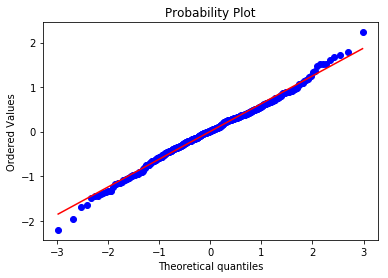

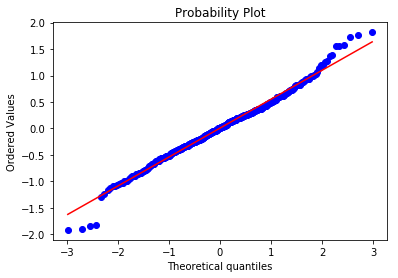

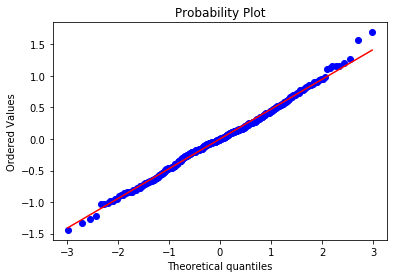

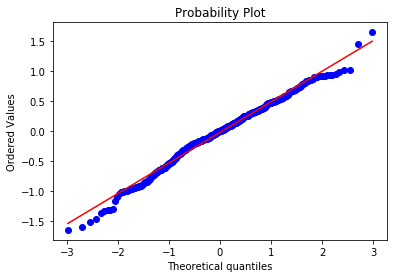

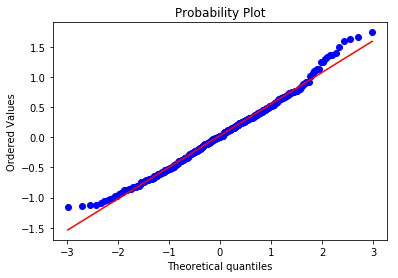

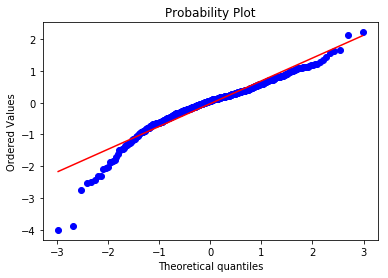

In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import probplot
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

def kfold_cv(k, crimenum, dataframe):
    lga_names = dataframe.index.unique()
    start_col = dataframe.columns.get_loc("Assault - domestic violence")
    kf = KFold(n_splits=5, shuffle=True)
    models = []
    rmse = []
    r2 = []
    allpreds = []
    output = pd.DataFrame(index=range(len(dataframe)))
    for train_index, test_index in kf.split(lga_names):
        train_lgas = lga_names[train_index]
        traindf = dataframe.loc[train_lgas].iloc[:,:start_col]
        train_target = dataframe.loc[dataframe.index.isin(train_lgas)].iloc[:,start_col+crimenum]
        
        test_lgas = lga_names[test_index]
        testdf = dataframe.loc[test_lgas].iloc[:,:start_col]
        test_target = dataframe.loc[dataframe.index.isin(test_lgas)].iloc[:,start_col+crimenum]
        #import pdb; pdb.set_trace()
        model = RandomForestRegressor()
        model.fit(normalize(traindf), train_target)
        models.append(model)
        #print(lga_loc)
        preds = model.predict(normalize(testdf))
        preds_series = pd.Series(preds)
        preds_series.index = test_target.index
        
        allpreds.append(pd.DataFrame({"preds": preds_series, "target": test_target}))
        
        #is this a fair measure
        rmse.append(np.sqrt(mean_squared_error(preds, test_target)))
        r2.append(r2_score(test_target, preds))

    allpreds_df = pd.concat(allpreds)
    #import pdb; pdb.set_trace()
    probplot(allpreds_df["target"] - allpreds_df["preds"], dist='norm', plot=plt)

    plt.show()
   
    rmse.append(np.sqrt(mean_squared_error(allpreds_df["preds"], allpreds_df["target"])))
    r2.append(r2_score(allpreds_df["target"], allpreds_df["preds"]))
    return output, rmse, r2, models, allpreds_df

outputs = []
for target in range(6):
    outputs.append(kfold_cv(5, target, master_df))

In [65]:
for i in range(len(outputs)):
    print(nswdf_target.columns[i])
    print("r2: ",outputs[i][2][-1])
    print("rmse: ",outputs[i][1][-1])

Assault - domestic violence
r2:  0.003785738687259621
rmse:  0.6221878527844903
Assault - non-domestic violence
r2:  0.025762912887672074
rmse:  0.5476186229841986
Fraud
r2:  0.1299187027736871
rmse:  0.4716326315588326
Sexual Offences
r2:  0.007301402884854924
rmse:  0.5089153457788842
Malicious damage to property
r2:  -0.012061939701220936
rmse:  0.524644872527044
Prohibited weapons offences
r2:  0.09339448121837668
rmse:  0.7400590273496195


In [ ]:
imp = []
for i, output in enumerate(outputs):
    imp.append(np.zeros(300))
    for mod in output[3]:
        imp[-1] = imp[-1] + mod.feature_importances_
   

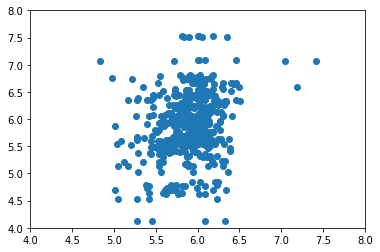

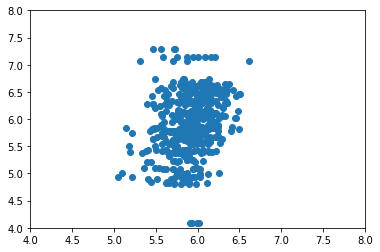

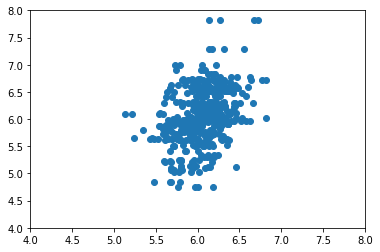

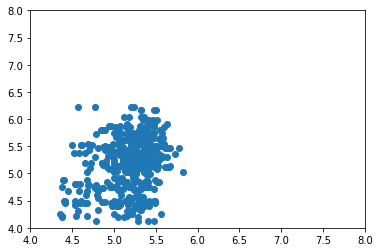

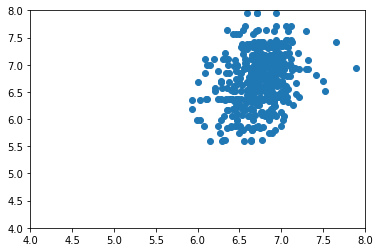

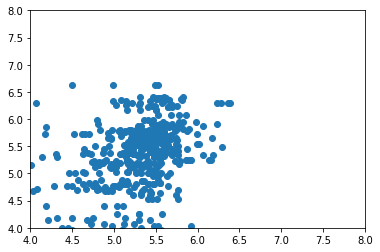

In [64]:
for i in range(len(outputs)):
    plt.scatter(outputs[i][-1].iloc[:,0], outputs[i][-1].iloc[:,1])
    plt.ylim((4,8))
    plt.xlim((4,8))
    plt.show()

In [ ]:
#for each target get most important topics
for i, importvec in enumerate(imp):
    print(nswdf_target.columns[i])
    top10 = np.argsort(importvec)[:10]
    for j in top10:
        print(model.show_topic(j))
        

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
x = range(start, stop, step)
plt.plot(x, coh)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()